In [ ]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm
import gc
import sys
import warnings
warnings.filterwarnings("ignore")

# Note: The dataset is too large in terms of features we will be using the dataset in form of chunks in the entire solution

In [ ]:
date = pd.read_csv('../input/bosch-production-line-performance/train_date.csv.zip', nrows=10000)
numeric = pd.read_csv('../input/bosch-production-line-performance/train_numeric.csv.zip', nrows=10000)
category = pd.read_csv('../input/bosch-production-line-performance/train_categorical.csv.zip', nrows=10000)

In [ ]:
date

,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,...,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263
0,4,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,19915,904.17,904.17,904.17,904.17,904.17,904.17,904.17,904.17,904.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,19917,640.60,640.60,640.60,640.60,640.60,640.60,640.60,640.60,640.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,19921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
numeric

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9996,19915,-0.147,-0.168,-0.033,-0.016,0.074,0.161,0.030,0.128,0.056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9997,19917,-0.095,0.004,0.330,0.312,-0.143,-0.339,0.037,0.128,0.061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9998,19921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
category

,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,19915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,19917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,19921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# FEATURE ENGINEERING

### The list of numeric features is selected based on the other XGBOOST classifier check the numericclassifier notebook

In [ ]:
num_feats = ['Id',
       'L3_S30_F3514', 'L0_S9_F200', 'L3_S29_F3430', 'L0_S11_F314',
       'L0_S0_F18', 'L3_S35_F3896', 'L0_S12_F350', 'L3_S36_F3918',
       'L0_S0_F20', 'L3_S30_F3684', 'L1_S24_F1632', 'L0_S2_F48',
       'L3_S29_F3345', 'L0_S18_F449', 'L0_S21_F497', 'L3_S29_F3433',
       'L3_S30_F3764', 'L0_S1_F24', 'L3_S30_F3554', 'L0_S11_F322',
       'L3_S30_F3564', 'L3_S29_F3327', 'L0_S2_F36', 'L0_S9_F180',
       'L3_S33_F3855', 'L0_S0_F4', 'L0_S21_F477', 'L0_S5_F114',
       'L0_S6_F122', 'L1_S24_F1122', 'L0_S9_F165', 'L0_S18_F439',
       'L1_S24_F1490', 'L0_S6_F132', 'L3_S29_F3379', 'L3_S29_F3336',
       'L0_S3_F80', 'L3_S30_F3749', 'L1_S24_F1763', 'L0_S10_F219',
 'Response']

In [ ]:
length = date.drop('Id', axis=1).count()
date_cols = length.reset_index().sort_values(by=0, ascending=False)
stations = sorted(date_cols['index'].str.split('_',expand=True)[1].unique().tolist())
date_cols['station'] = date_cols['index'].str.split('_',expand=True)[1]
date_cols = date_cols.drop_duplicates('station', keep='first')['index'].tolist()

In [ ]:
data = None
for chunk in pd.read_csv('../input/bosch-production-line-performance/train_date.csv.zip',usecols=['Id'] + date_cols,chunksize=50000,low_memory=False):

    chunk.columns = ['Id'] + stations
    chunk['start_station'] = -1
    chunk['end_station'] = -1
    
    for s in stations:
        chunk[s] = 1 * (chunk[s] >= 0)
        id_not_null = chunk[chunk[s] == 1].Id
        chunk.loc[(chunk['start_station']== -1) & (chunk.Id.isin(id_not_null)),'start_station'] = int(s[1:])
        chunk.loc[chunk.Id.isin(id_not_null),'end_station'] = int(s[1:])   
    data = pd.concat([data, chunk])

In [ ]:
for chunk in pd.read_csv('../input/bosch-production-line-performance/test_date.csv.zip',usecols=['Id'] + date_cols,chunksize=50000,low_memory=False):
    
    chunk.columns = ['Id'] + stations
    chunk['start_station'] = -1
    chunk['end_station'] = -1
    for s in stations:
        chunk[s] = 1 * (chunk[s] >= 0)
        id_not_null = chunk[chunk[s] == 1].Id
        chunk.loc[(chunk['start_station']== -1) & (chunk.Id.isin(id_not_null)),'start_station'] = int(s[1:])
        chunk.loc[chunk.Id.isin(id_not_null),'end_station'] = int(s[1:])   
    data = pd.concat([data, chunk])
del chunk
gc.collect()   

In [ ]:
data = data[['Id','start_station','end_station']]
usefuldatefeatures = ['Id']+date_cols

In [ ]:
minmaxfeatures = None
for chunk in pd.read_csv('../input/bosch-production-line-performance/train_date.csv.zip',usecols=usefuldatefeatures,chunksize=50000,low_memory=False):
    features = chunk.columns.values.tolist()
    features.remove('Id')
    df_mindate_chunk = chunk[['Id']].copy()
    df_mindate_chunk['mindate'] = chunk[features].min(axis=1).values
    df_mindate_chunk['maxdate'] = chunk[features].max(axis=1).values
    df_mindate_chunk['min_time_station'] =  chunk[features].idxmin(axis = 1).apply(lambda s: int(s.split('_')[1][1:]) if s is not np.nan else -1)
    df_mindate_chunk['max_time_station'] =  chunk[features].idxmax(axis = 1).apply(lambda s: int(s.split('_')[1][1:]) if s is not np.nan else -1)
    minmaxfeatures = pd.concat([minmaxfeatures, df_mindate_chunk])

del chunk
gc.collect()

In [ ]:
for chunk in pd.read_csv('../input/bosch-production-line-performance/test_date.csv.zip',usecols=usefuldatefeatures,chunksize=50000,low_memory=False):
    features = chunk.columns.values.tolist()
    features.remove('Id')
    df_mindate_chunk = chunk[['Id']].copy()
    df_mindate_chunk['mindate'] = chunk[features].min(axis=1).values
    df_mindate_chunk['maxdate'] = chunk[features].max(axis=1).values
    df_mindate_chunk['min_time_station'] =  chunk[features].idxmin(axis = 1).apply(lambda s: int(s.split('_')[1][1:]) if s is not np.nan else -1)
    df_mindate_chunk['max_time_station'] =  chunk[features].idxmax(axis = 1).apply(lambda s: int(s.split('_')[1][1:]) if s is not np.nan else -1)
    minmaxfeatures = pd.concat([minmaxfeatures, df_mindate_chunk])

del chunk
gc.collect()

In [ ]:
minmaxfeatures.sort_values(by=['mindate', 'Id'], inplace=True)
minmaxfeatures['min_Id_rev'] = -minmaxfeatures.Id.diff().shift(-1)
minmaxfeatures['min_Id'] = minmaxfeatures.Id.diff()

In [ ]:
cols = [['Id']+date_cols,num_feats]

In [ ]:
traindata = None
testdata = None

In [ ]:
trainfiles = ['train_date.csv.zip','train_numeric.csv.zip']
testfiles = ['test_date.csv.zip','test_numeric.csv.zip']

In [ ]:
for i,f in enumerate(trainfiles):
    
    subset = None
    
    for chunk in pd.read_csv('../input/bosch-production-line-performance/' + f,usecols=cols[i],chunksize=100000,low_memory=False):
        subset = pd.concat([subset, chunk])
    
    if traindata is None:
        traindata = subset.copy()
    else:
        traindata = pd.merge(traindata, subset.copy(), on="Id")
        
del subset,chunk
gc.collect()
del cols[1][-1]

In [ ]:
for i, f in enumerate(testfiles):
    subset = None
    
    for chunk in pd.read_csv('../input/bosch-production-line-performance/' + f,usecols=cols[i],chunksize=100000,low_memory=False):
        subset = pd.concat([subset, chunk])
        
    if testdata is None:
        testdata = subset.copy()
    else:
        testdata = pd.merge(testdata, subset.copy(), on="Id")
    
del subset,chunk
gc.collect()

In [ ]:
traindata = traindata.merge(minmaxfeatures, on='Id')
traindata = traindata.merge(data, on='Id')
testdata = testdata.merge(minmaxfeatures, on='Id')
testdata = testdata.merge(data, on='Id')

In [ ]:
del minmaxfeatures,data
gc.collect()

In [ ]:
train = traindata[::2]
valid = traindata[1::2]

In [ ]:
del traindata
gc.collect()

In [ ]:
def mcc(tp, tn, fp, fn):
    num = tp * tn - fp * fn
    den = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    if den == 0:
        return 0
    else:
        return num / np.sqrt(den)

In [ ]:
def eval_mcc(y_true, y_prob):
    idx = np.argsort(y_prob)
    y_true_sort = y_true[idx]
    n = y_true.shape[0]
    nump = 1.0 * np.sum(y_true) 
    numn = n - nump 
    tp,fp = nump,numn
    tn,fn = 0.0,0.0
    best_mcc = 0.0
    best_id = -1
    mccs = np.zeros(n)
    for i in range(n):
        if y_true_sort[i] == 1:
            tp -= 1.0
            fn += 1.0
        else:
            fp -= 1.0
            tn += 1.0
        new_mcc = mcc(tp, tn, fp, fn)
        mccs[i] = new_mcc
        if new_mcc >= best_mcc:
            best_mcc = new_mcc
            best_id = i
    return best_mcc

In [ ]:
def mcc_eval(y_prob, dtrain):
    y_true = dtrain.get_label()
    best_mcc = eval_mcc(y_true, y_prob)
    return 'MCC', best_mcc

# MODELLING

In [ ]:
import xgboost as xgb
params = {'objective':"binary:logistic",
          'max_depth':25,
          'base_score' = 0.005,
          'eval_metric':'auc',
          'n_jobs':-1
}

In [ ]:
trainm = xgb.DMatrix(train.drop(['Response','Id'],axis=1),train['Response'])
validm = xgb.DMatrix(valid.drop(['Response','Id'],axis=1),valid['Response'])

test = xgb.DMatrix(testdata.drop(['Id'],axis=1))

In [ ]:
#del train,valid,testdata
#gc.collect()

In [ ]:
watchlist = [(trainm, 'train'), (validm, 'val')]
clf = xgb.train(params, trainm,
                num_boost_round=100,
                evals=watchlist,
                early_stopping_rounds=20,
                feval=mcc_eval,
                maximize=True
                )

[0]	train-auc:0.95180	val-auc:0.87291	train-MCC:0.31795	val-MCC:0.28061
Multiple eval metrics have been passed: 'val-MCC' will be used for early stopping.

Will train until val-MCC hasn't improved in 20 rounds.
[1]	train-auc:0.86988	val-auc:0.78568	train-MCC:0.33085	val-MCC:0.26641
[2]	train-auc:0.85854	val-auc:0.76640	train-MCC:0.30404	val-MCC:0.19033
[3]	train-auc:0.95343	val-auc:0.84072	train-MCC:0.39903	val-MCC:0.21786
[4]	train-auc:0.95719	val-auc:0.84205	train-MCC:0.48053	val-MCC:0.23077
[5]	train-auc:0.96318	val-auc:0.84587	train-MCC:0.54135	val-MCC:0.23908
[6]	train-auc:0.96737	val-auc:0.84620	train-MCC:0.64790	val-MCC:0.25339
[7]	train-auc:0.96920	val-auc:0.84561	train-MCC:0.70495	val-MCC:0.27464
[8]	train-auc:0.97016	val-auc:0.84602	train-MCC:0.73993	val-MCC:0.28269
[9]	train-auc:0.97231	val-auc:0.84541	train-MCC:0.78215	val-MCC:0.28642
[10]	train-auc:0.97358	val-auc:0.84617	train-MCC:0.81478	val-MCC:0.28762
[11]	train-auc:0.98200	val-auc:0.85118	train-MCC:0.84855	val-MCC:0.2

In [ ]:
predictions = clf.predict(validm)

0.35000000000000003
0.3546932387841169


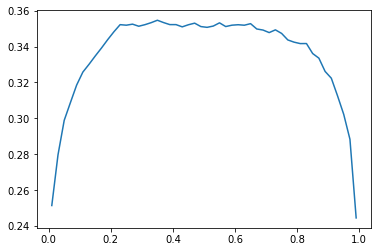

In [ ]:
from sklearn.metrics import matthews_corrcoef
thresholds = np.linspace(0.01, 0.99, 50)
mcc = np.array([matthews_corrcoef(valid.Response, predictions>threshold) for threshold in thresholds])

plt.plot(thresholds, mcc)
best_prob = thresholds[mcc.argmax()]
best_prob

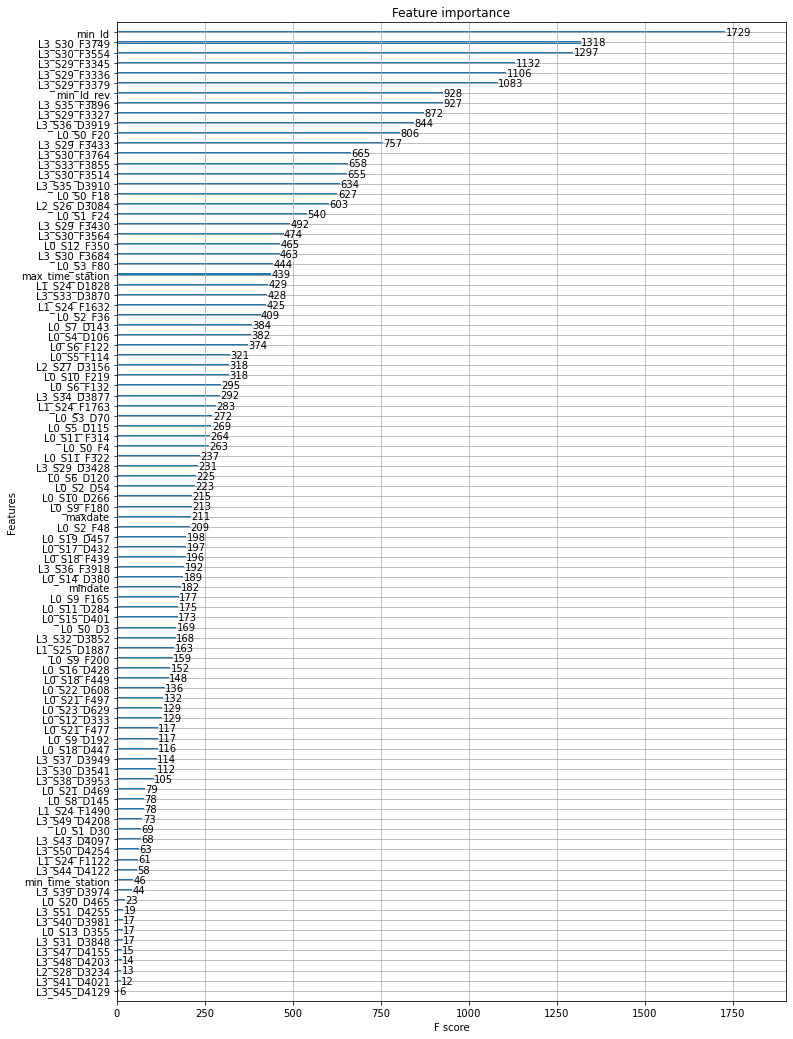

In [ ]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(clf,ax=ax)

In [ ]:
test = clf.predict(test)

In [ ]:
testdata['Response'] = (test>best_prob).astype(int)
testdata[['Id','Response']].to_csv("submitwoId.csv",index=False)

In [ ]:
!gzip submitwoId.csv